## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

== Summary Statistics ==
              Age         Income        Score
count    8.000000       8.000000     9.000000
mean    53.375000   70875.000000   113.666667
std     59.651218   24386.398434   332.377045
min     25.000000   40000.000000     1.000000
25%     27.500000   57500.000000     2.000000
50%     31.500000   67500.000000     3.000000
75%     41.250000   80500.000000     4.000000
max    200.000000  120000.000000  1000.000000


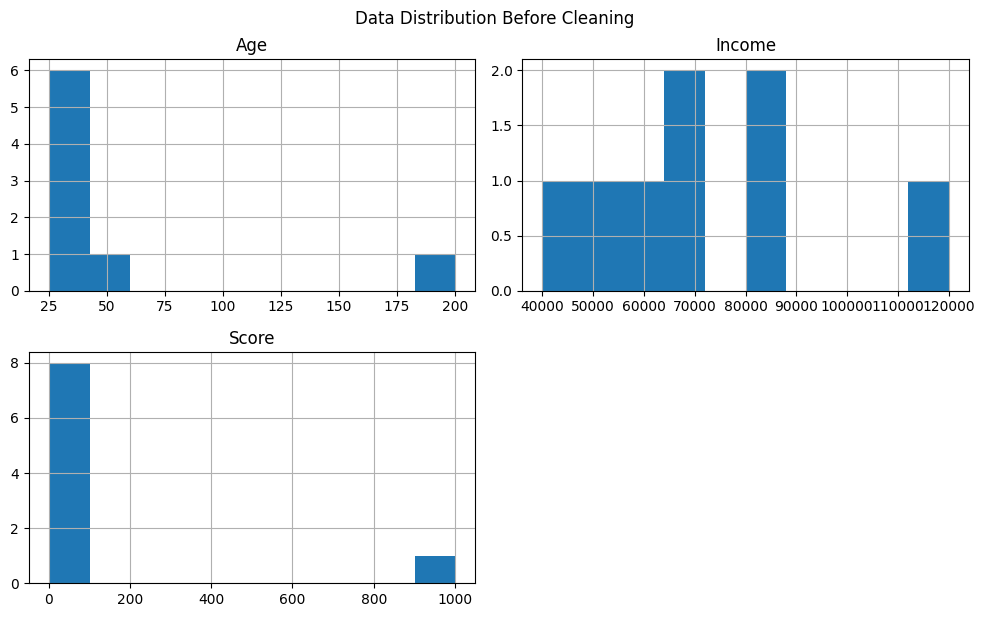


== Null Values ==
Age       2
Income    2
Score     1
dtype: int64


In [2]:
# Task 1: Summary Statistics





# Task 2: Visualize Data Distribution





# Task 3: Checking for Null Values


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer
import logging
import json

# ------------------- Setup Logging -------------------
logging.basicConfig(level=logging.INFO, filename='preprocessing.log', filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

# ------------------- Sample Dataset -------------------
data = {
    'Age': [25, 30, np.nan, 45, 200, 40, 33, np.nan, 28, 26],
    'Income': [50000, 60000, 65000, np.nan, 120000, 70000, 80000, 82000, np.nan, 40000],
    'Score': [1, 2, 3, 4, 5, 1000, 3, 2, np.nan, 3]
}
df = pd.DataFrame(data)
logging.info("Loaded sample data")

# ------------------- Task 1: Summary Statistics -------------------
print("== Summary Statistics ==")
print(df.describe())

# ------------------- Task 2: Visualize Data Distribution -------------------
import matplotlib.pyplot as plt
df.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.suptitle("Data Distribution Before Cleaning", y=1.02)
plt.show()

# ------------------- Task 3: Check for Null Values -------------------
print("\n== Null Values ==")
print(df.isnull().sum())

## Handle Missing & Inconsistent Data Before Applying ML Models

In [3]:
# Task 4: Drop Missing Values





# Task 5: Fill Missing Values




# Task 6: Handling Outliers with Capping


# ------------------- Task 4: Drop Missing Values -------------------
df_dropped = df.dropna()
print("\n== After Dropping Missing Values ==")
print(df_dropped)

# ------------------- Task 5: Fill Missing Values -------------------
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\n== After Filling Missing Values ==")
print(df_imputed)

# ------------------- Task 6: Handle Outliers with Capping -------------------
def cap_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return col.clip(lower, upper)

df_capped = df_imputed.copy()
for col in df_capped.columns:
    df_capped[col] = cap_outliers(df_capped[col])

print("\n== After Capping Outliers ==")
print(df_capped)




== After Dropping Missing Values ==
     Age    Income   Score
0   25.0   50000.0     1.0
1   30.0   60000.0     2.0
4  200.0  120000.0     5.0
5   40.0   70000.0  1000.0
6   33.0   80000.0     3.0
9   26.0   40000.0     3.0

== After Filling Missing Values ==
       Age    Income        Score
0   25.000   50000.0     1.000000
1   30.000   60000.0     2.000000
2   53.375   65000.0     3.000000
3   45.000   70875.0     4.000000
4  200.000  120000.0     5.000000
5   40.000   70000.0  1000.000000
6   33.000   80000.0     3.000000
7   53.375   82000.0     2.000000
8   28.000   70875.0   113.666667
9   26.000   40000.0     3.000000

== After Capping Outliers ==
         Age      Income  Score
0  25.000000   50000.000    1.0
1  30.000000   60000.000    2.0
2  53.375000   65000.000    3.0
3  45.000000   70875.000    4.0
4  85.453125  102421.875    5.0
5  40.000000   70000.000    8.5
6  33.000000   80000.000    3.0
7  53.375000   82000.000    2.0
8  28.000000   70875.000    8.5
9  26.000000  

## Choose the Right Scaling Method

In [4]:
# Task 7: Min-Max Scaling







# Task 8: Robust Scaling






# Task 9: MaxAbs Scaling



# ------------------- Task 7: Min-Max Scaling -------------------
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_capped), columns=df.columns)
print("\n== After Min-Max Scaling ==")
print(df_minmax_scaled)

# ------------------- Task 8: Robust Scaling -------------------
robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df_capped), columns=df.columns)
print("\n== After Robust Scaling ==")
print(df_robust_scaled)

# ------------------- Task 9: MaxAbs Scaling -------------------
maxabs_scaler = MaxAbsScaler()
df_maxabs_scaled = pd.DataFrame(maxabs_scaler.fit_transform(df_capped), columns=df.columns)
print("\n== After MaxAbs Scaling ==")
print(df_maxabs_scaled)




== After Min-Max Scaling ==
        Age    Income     Score
0  0.000000  0.160200  0.000000
1  0.082709  0.320401  0.133333
2  0.469372  0.400501  0.266667
3  0.330835  0.494618  0.400000
4  1.000000  1.000000  0.533333
5  0.248126  0.480601  1.000000
6  0.132334  0.640801  0.266667
7  0.469372  0.672841  0.133333
8  0.049625  0.494618  1.000000
9  0.016542  0.000000  0.266667

== After Robust Scaling ==
        Age    Income  Score
0 -0.504801 -1.240987   -0.8
1 -0.285322 -0.633776   -0.4
2  0.740741 -0.330171    0.0
3  0.373114  0.026565    0.4
4  2.148834  1.942125    0.8
5  0.153635 -0.026565    2.2
6 -0.153635  0.580645    0.0
7  0.740741  0.702087   -0.4
8 -0.373114  0.026565    2.2
9 -0.460905 -1.848197    0.0

== After MaxAbs Scaling ==
        Age    Income     Score
0  0.292558  0.488177  0.117647
1  0.351070  0.585812  0.235294
2  0.624611  0.634630  0.352941
3  0.526604  0.691991  0.470588
4  1.000000  1.000000  0.588235
5  0.468093  0.683448  1.000000
6  0.386177  0.78108

## Keep Track of Data Transformations for Reproducibility

In [5]:
# Task 10: Log Data Preprocessing Steps






# Task 11: Store Transformation Parameters



logging.info("Filled missing values using mean imputation.")
logging.info("Handled outliers using IQR capping.")
logging.info("Applied MinMaxScaler, RobustScaler, and MaxAbsScaler.")

# ------------------- Task 11: Store Transformation Parameters -------------------
params = {
    "minmax_scaler": {
        "min_": minmax_scaler.data_min_.tolist(),
        "max_": minmax_scaler.data_max_.tolist()
    },
    "robust_scaler": {
        "center_": robust_scaler.center_.tolist(),
        "scale_": robust_scaler.scale_.tolist()
    },
    "maxabs_scaler": {
        "max_abs_": maxabs_scaler.max_abs_.tolist()
    },
    "imputer": {
        "statistics_": imputer.statistics_.tolist()
    }
}

with open('transformation_params.json', 'w') as f:
    json.dump(params, f, indent=4)
logging.info("Stored transformation parameters to transformation_params.json")



== Summary Statistics ==
              Age         Income        Score
count    8.000000       8.000000     9.000000
mean    53.375000   70875.000000   113.666667
std     59.651218   24386.398434   332.377045
min     25.000000   40000.000000     1.000000
25%     27.500000   57500.000000     2.000000
50%     31.500000   67500.000000     3.000000
75%     41.250000   80500.000000     4.000000
max    200.000000  120000.000000  1000.000000


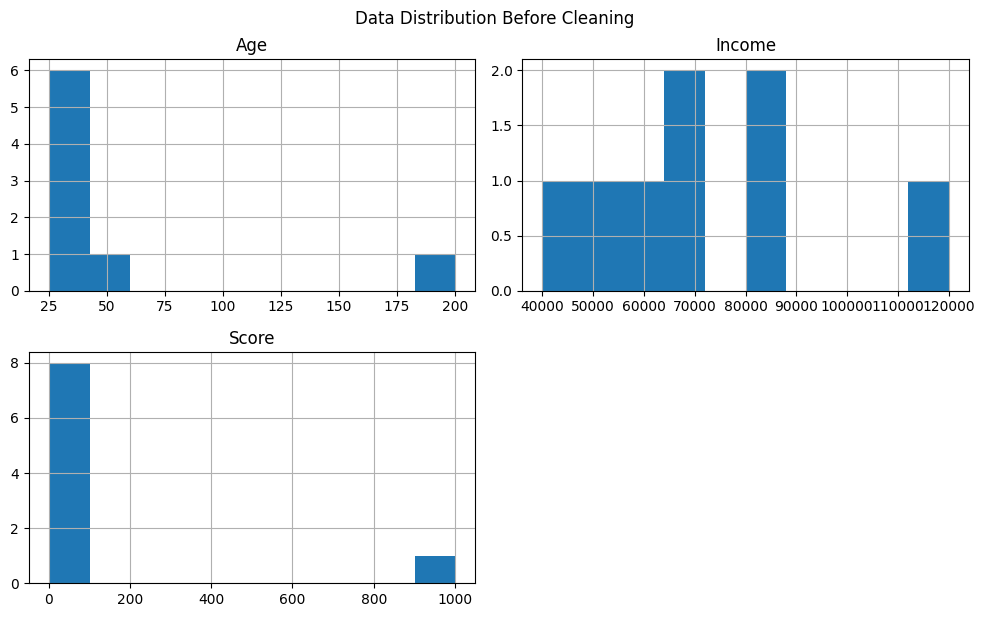


== Null Values ==
Age       2
Income    2
Score     1
dtype: int64

== After Dropping Missing Values ==
     Age    Income   Score
0   25.0   50000.0     1.0
1   30.0   60000.0     2.0
4  200.0  120000.0     5.0
5   40.0   70000.0  1000.0
6   33.0   80000.0     3.0
9   26.0   40000.0     3.0

== After Filling Missing Values ==
       Age    Income        Score
0   25.000   50000.0     1.000000
1   30.000   60000.0     2.000000
2   53.375   65000.0     3.000000
3   45.000   70875.0     4.000000
4  200.000  120000.0     5.000000
5   40.000   70000.0  1000.000000
6   33.000   80000.0     3.000000
7   53.375   82000.0     2.000000
8   28.000   70875.0   113.666667
9   26.000   40000.0     3.000000

== After Capping Outliers ==
         Age      Income  Score
0  25.000000   50000.000    1.0
1  30.000000   60000.000    2.0
2  53.375000   65000.000    3.0
3  45.000000   70875.000    4.0
4  85.453125  102421.875    5.0
5  40.000000   70000.000    8.5
6  33.000000   80000.000    3.0
7  53.3750